In [1]:
%matplotlib inline
from django.db.models import Q
import matplotlib.pyplot as plt
from coordmanager.models import Coordinate
plt.style.use('seaborn-whitegrid')
query_point = (551877.0, 1325102.2)
num_point = 500

INFO 2020-10-04 11:57:13,748 font_manager 27 139924068874048 Generating new fontManager, this may take some time...


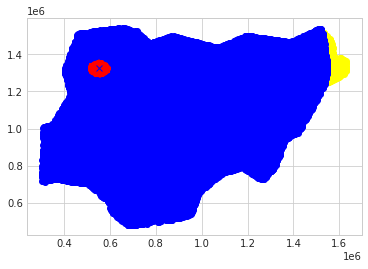

In [3]:
nearest = Coordinate.objects.distance(query_point[0], query_point[1]).order_by('distance')[0:num_point]
furthest = Coordinate.objects.distance(query_point[0], query_point[1]).order_by('-distance')[0:num_point]
rest = Coordinate.objects.exclude(
    Q(id__in=nearest.values_list('id', flat=True)) | Q(id__in=furthest.values_list('id', flat=True))
)
for point in nearest.values('x','y'):
    plt.plot(point['x'], point['y'], 'o', color='red')
for point in furthest.values('x','y'):
    plt.plot(point['x'], point['y'], 'o', color='yellow')
for point in rest.values('x','y'):
    plt.plot(point['x'], point['y'], 'o', color='blue')

plt.plot(query_point[0], query_point[1], 'x', color='blue')
plt.show()